In [ ]:
import pandas as pd
import re
import string
import numpy as np
from sklearn.feature_extraction import _stop_words
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

In [ ]:
from google.colab import files
df = files.upload()


Saving DATASET COPYYYYYYYYY - HINDI DATASET.csv to DATASET COPYYYYYYYYY - HINDI DATASET (2).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(df['DATASET COPYYYYYYYYY - HINDI DATASET.csv']))

In [ ]:
df.head()

,labels,text_hi
0,ham,"Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि..."
1,ham,ओके लामर.... if if uue पर.
2,spam,Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...
3,ham,Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...
4,ham,"नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ..."


In [ ]:
df["text"] = df.text_hi
df["spam"] = df.labels

# Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
emails_train, emails_test, target_train, target_test = train_test_split(df.text,df.spam,test_size = 0.2)

In [ ]:
df.info

<bound method DataFrame.info of      labels                                            text_hi  \
0       ham  Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   
1       ham                         ओके लामर.... if if uue पर.   
2      spam  Fktatatat 21 मई को प्राप्त करने के लिए मुफ्त प...   
3       ham  Uden इतना जल्दी कहते हैं... तो पहले से ही यूसी...   
4       ham  नहीं, मुझे नहीं लगता कि वह हमारे लिए चला जाता ...   
...     ...                                                ...   
6575    ham                         हे माँ! आप क्या कर रहे हो?   
6576   spam  इस नए साल में अपने प्रियजनों को हाथ से बनी विश...   
6577   spam  बारबेक्यू नेशन में आपके और आपके प्रियजनों के ल...   
6578    ham    मुझे बाहर जाने के बजाय घर के अंदर रहना पसंद है।   
6579   spam  कम से कम हमारे नए सनस्क्रीन के साथ खुद को धूप ...   

                                                   text  spam  
0     Dakag बिंदु तक जाओ, पागल. केवल Bag Non महान वि...   ham  
1                            ओके लामर.... if if

In [ ]:
emails_train.shape

(5264,)

# Preprocessing

In [ ]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", "", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result

def remove_whitespace(word):
    result = word.strip()
    return result

def replace_newline(word):
    return word.replace('\n','')



def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation,remove_whitespace]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence

x_train = [clean_up_pipeline(o) for o in emails_train]
x_test = [clean_up_pipeline(o) for o in emails_test]

x_train[3]

'वास्तव में एक कागज लिखना एक फिल्म के लिए जाना और आधी रात तक घर हो है न'

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(target_train.values)
test_y = le.transform(target_test.values)

In [ ]:
train_y

array([0, 0, 0, ..., 0, 3, 3])

# Tokenize

In [ ]:
embed_size = 100
max_feature = 50000
max_len = 2000

In [ ]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=max_feature)

tokenizer.fit_on_texts(x_train)

x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
x_test_features = np.array(tokenizer.texts_to_sequences(x_test))

x_train_features[0]

<ipython-input-73-6103b351f173>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train_features = np.array(tokenizer.texts_to_sequences(x_train))
<ipython-input-73-6103b351f173>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test_features = np.array(tokenizer.texts_to_sequences(x_test))


[33,
 32,
 154,
 13,
 933,
 130,
 410,
 547,
 451,
 8,
 800,
 17,
 548,
 30,
 6,
 549,
 242,
 130,
 3,
 200,
 161,
 16,
 411,
 19,
 2,
 4,
 15,
 20,
 18,
 346]

# Padding

In [ ]:
from keras_preprocessing.sequence import pad_sequences
x_train_features = pad_sequences(x_train_features,maxlen=max_len)
x_test_features = pad_sequences(x_test_features,maxlen=max_len)
x_train_features[0]

array([  0,   0,   0, ...,  20,  18, 346], dtype=int32)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_y = le.fit_transform(target_train.values)
test_y = le.transform(target_test.values)

# Model

In [ ]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional
from keras.models import Model

In [ ]:
import tensorflow as tf
embedding_vecor_length = 32

model = tf.keras.Sequential()
model.add(Embedding(max_feature, embedding_vecor_length, input_length=max_len))
model.add(Bidirectional(tf.keras.layers.LSTM(64)))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 2000, 32)          1600000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 128)              49664     
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 16)                2064      
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,651,745
Trainable params: 1,651,745
Non-trainable params: 0
____________________________________________

In [ ]:
history = model.fit(x_train_features, train_y, batch_size=64, epochs=10, validation_data=(x_test_features, test_y))

Epoch 1/10
83/83 [==============================] - 265s 3s/step - loss: -449.0676 - accuracy: 0.6468 - val_loss: -542.2006 - val_accuracy: 0.7257
Epoch 2/10
83/83 [==============================] - 256s 3s/step - loss: -645.4849 - accuracy: 0.7035 - val_loss: -717.5043 - val_accuracy: 0.7280
Epoch 3/10
83/83 [==============================] - 255s 3s/step - loss: -822.8694 - accuracy: 0.7154 - val_loss: -871.7060 - val_accuracy: 0.7614
Epoch 4/10
83/83 [==============================] - 255s 3s/step - loss: -1008.6472 - accuracy: 0.7232 - val_loss: -1073.4385 - val_accuracy: 0.7295
Epoch 5/10
83/83 [==============================] - 254s 3s/step - loss: -1204.8275 - accuracy: 0.7304 - val_loss: -1263.3298 - val_accuracy: 0.7234
Epoch 6/10
83/83 [==============================] - 254s 3s/step - loss: -1425.9514 - accuracy: 0.7312 - val_loss: -1455.6301 - val_accuracy: 0.7401
Epoch 7/10
83/83 [==============================] - 252s 3s/step - loss: -1633.3746 - accuracy: 0.7181 - val_los

In [ ]:
y_predict = [1 if o>0.5 else 0 for o in model.predict(x_test_features)]

35/35 [==============================] - 13s 371ms/step


In [ ]:
sms_test = ['आपके नए iPhone के लिए बधाई! अपने पुरस्कार का दावा करने के लिए यहां क्लिक करें...']
sms_seq = tokenizer.texts_to_sequences(sms_test)

sms_pad = pad_sequences(sms_seq, maxlen=20, padding='post')
tokenizer.index_word
sms_pad
model.predict(sms_pad)

1/1 [==============================] - 0s 44ms/step


array([[0.8551955]], dtype=float32)

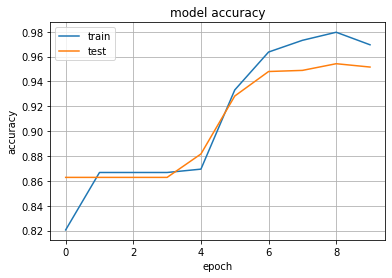

In [ ]:
from  matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(test_y,y_predict)
tn, fp, fn, tp = confusion_matrix(test_y,y_predict).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(test_y, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(test_y, y_predict)))
print("F1 Score: {:.2f}%".format(100 * f1_score(test_y,y_predict)))

Precision: 96.26%
Recall: 67.32%
F1 Score: 79.23%


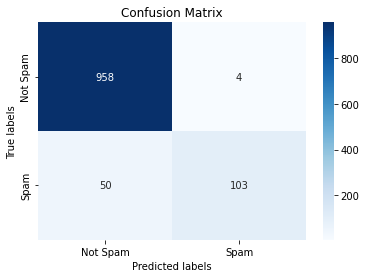

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not Spam', 'Spam']);